# 3장. 단순회귀 모형의 추정
## 3.1 자료

### 예: 2005년 183개국 1인당 GDP와 1인당 이산화탄소 배출량

In [1]:
datadir = "http://econ.korea.ac.kr/~chirokhan/book/data"

In [7]:
ekc = read.csv(file.path(datadir, "co2gdp2005.csv"))

In [22]:
attach(ekc)

In [35]:
head(ekc)

ccode,cname,gdppcppp,co2pc
AFG,Afghanistan,1039.408,0.05485483
ALB,Albania,6199.928,1.41249821
ARE,United Arab Emirates,84338.359,25.91458723
ARM,Armenia,4716.243,1.44373096
ATG,Antigua and Barbuda,19067.068,4.97431115
AUS,Australia,32559.459,17.17438627


In [36]:
tail(ekc)

,ccode,cname,gdppcppp,co2pc
178,WSM,Samoa,4749.4837,0.93749722
179,YEM,"Yemen, Rep.",3756.5321,0.97753832
180,ZAF,South Africa,9912.5348,8.27512392
181,COD,"Congo, Dem. Rep.",476.7372,0.04432602
182,ZMB,Zambia,2221.3727,0.18908040
183,ZWE,Zimbabwe,1472.4351,0.82521789


In [37]:
names(ekc)

[1] "ccode"    "cname"    "gdppcppp" "co2pc"

In [38]:
nrow(ekc)

[1] 183

In [39]:
summary(ekc)

     ccode                     cname        gdppcppp            co2pc         
 AFG    :  1   Afghanistan        :  1   Min.   :   476.7   Min.   : 0.01941  
 ALB    :  1   Albania            :  1   1st Qu.:  2519.9   1st Qu.: 0.61732  
 ARE    :  1   Algeria            :  1   Median :  7771.4   Median : 2.17747  
 ARM    :  1   Antigua and Barbuda:  1   Mean   : 13962.3   Mean   : 4.69970  
 ATG    :  1   Armenia            :  1   3rd Qu.: 18034.8   3rd Qu.: 6.89611  
 AUS    :  1   Australia          :  1   Max.   :102253.1   Max.   :61.98976  
 (Other):177   (Other)            :177                                        

In [46]:
options(repr.plot.width=4, repr.plot.height=4)

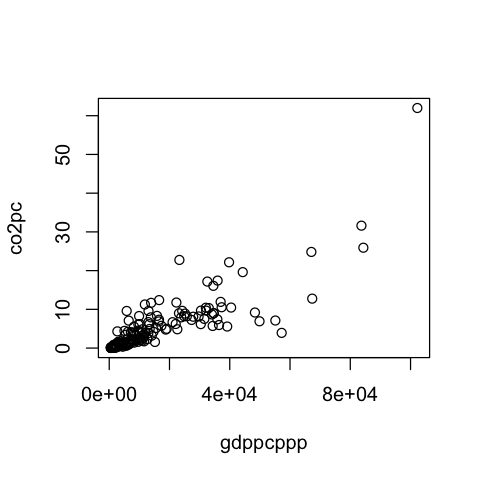

In [48]:
plot(co2pc~gdppcppp, data=ekc)

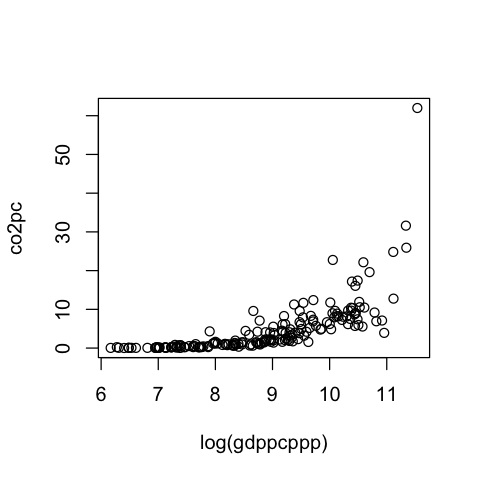

In [49]:
plot(co2pc~log(gdppcppp), data=ekc)

In [50]:
ols1 = lm(co2pc ~ log(gdppcppp))

In [51]:
summary(ols1)


Call:
lm(formula = co2pc ~ log(gdppcppp))

Residuals:
   Min     1Q Median     3Q    Max 
-8.562 -2.690 -0.698  1.454 47.353 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -28.1034     2.6500  -10.61   <2e-16 ***
log(gdppcppp)   3.7052     0.2964   12.50   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.03 on 181 degrees of freedom
Multiple R-squared:  0.4634,	Adjusted R-squared:  0.4604 
F-statistic: 156.3 on 1 and 181 DF,  p-value: < 2.2e-16


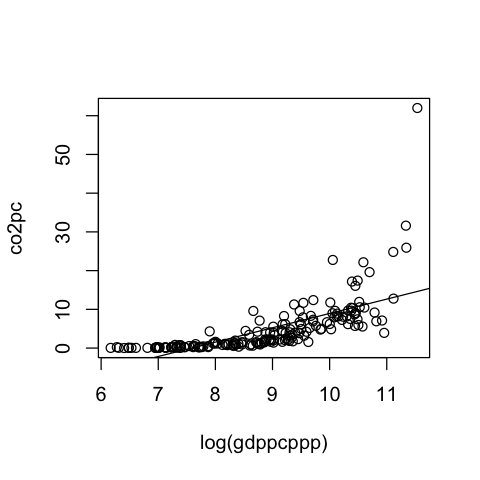

In [52]:
plot(co2pc~log(gdppcppp))
abline(ols1)

경제가 성장하면 이산화탄소 배출량이 늘어난다는 결론

### 2010년 군별 재정자립도와 공무원 수

In [54]:
serv = read.csv(file.path(datadir, "serv.csv"))

In [55]:
head(serv)

gun,servpc,finind
BuSan GiJangGun,4.87,40.4
DaeGu DalSeongGun,3.78,38.5
InCheon GangHwaGun,9.69,17.2
InCheon OngJinGun,28.28,22.7
UlSan UlJuGun,3.75,48.6
GyeongGi YeoJuGun,6.30,35.8


In [56]:
summary(serv)

                    gun         servpc           finind     
 BuSan GiJangGun      : 1   Min.   : 3.750   Min.   : 8.60  
 ChungBuk BoEunGun    : 1   1st Qu.: 9.818   1st Qu.:11.72  
 ChungBuk CheongWonGun: 1   Median :12.070   Median :14.10  
 ChungBuk DanYangGun  : 1   Mean   :12.835   Mean   :17.29  
 ChungBuk EumSeongGun : 1   3rd Qu.:15.710   3rd Qu.:19.98  
 ChungBuk GoiSanGun   : 1   Max.   :33.450   Max.   :48.60  
 (Other)              :80                                   

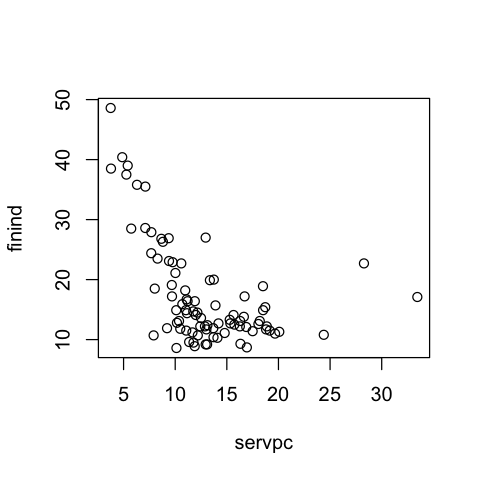

In [58]:
plot(finind~servpc, data=serv)

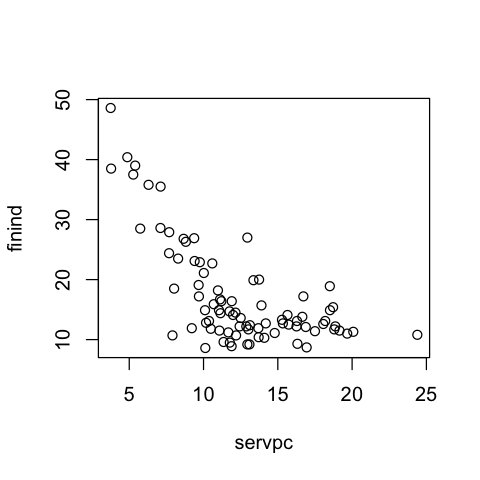

In [59]:
plot(finind~servpc, data=serv, subset=servpc<28)

In [60]:
nrow(serv)

[1] 86

In [61]:
serv1 = serv[serv$servpc<28,]
#serv2 = subset(serv, servpc<28) 동일한 결과

In [62]:
nrow(serv1)

[1] 84

In [63]:
attach(serv)

In [64]:
serv2 = subset(serv, servpc<28)
nrow(serv2)

[1] 84

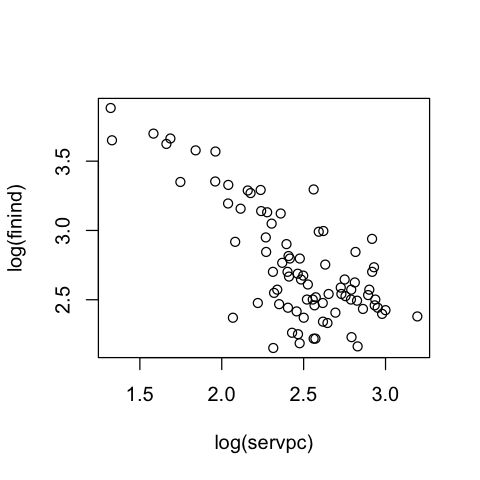

In [65]:
plot(log(finind)~log(servpc), data=serv1)
abline()

In [76]:
ols2 = lm(log(finind)~log(servpc), data=serv1)
summary(ols2)


Call:
lm(formula = log(finind) ~ log(servpc), data = serv1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.71501 -0.16710  0.02468  0.19709  0.63156 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.7675     0.2024   23.56  < 2e-16 ***
log(servpc)  -0.8212     0.0815  -10.08 5.27e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2798 on 82 degrees of freedom
Multiple R-squared:  0.5532,	Adjusted R-squared:  0.5478 
F-statistic: 101.5 on 1 and 82 DF,  p-value: 5.274e-16


공무원 수가 1% 증가할 때 재정자립도가 0.82% 감소한다 

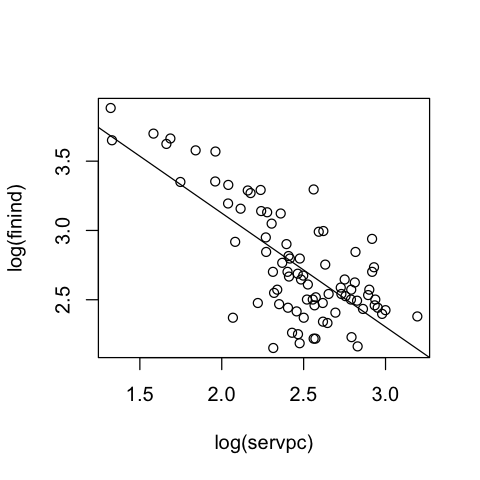

In [77]:
plot(log(finind)~log(servpc), data=serv1)
abline(ols2)

공무원 수가 많을수록 재정 자립도가 떨어지는 모양새

### 예: 교육수준과 임금

In [79]:
klips = read.csv(file.path(datadir, "klips11subset.csv"))

In [80]:
tail(klips)

,age,educ,tenure,regular,hours,earn,labinc,married
641,31,16,3,1,40,230,27.60,1
642,31,16,1,1,64,320,24.30,1
643,35,14,2,1,45,250,28.56,1
644,30,16,2,1,72,250,30.00,1
645,36,16,6,1,60,325,34.50,1
646,30,16,3,1,40,220,26.40,1


In [82]:
# regular가 1이고 married가 1 (정규직 기혼자) 조건을 충족하는 데이터를 추출
klips1 = subset(klips, regular==1 & married==1)

In [94]:
nrow(klips)

[1] 646

In [95]:
nrow(klips1)

[1] 501

In [96]:
summary(klips1)

      age             educ           tenure        regular      hours       
 Min.   :30.00   Min.   : 9.00   Min.   : 0.0   Min.   :1   Min.   :  9.00  
 1st Qu.:33.00   1st Qu.:12.00   1st Qu.: 2.0   1st Qu.:1   1st Qu.: 44.00  
 Median :35.00   Median :14.00   Median : 5.0   Median :1   Median : 50.00  
 Mean   :34.92   Mean   :14.43   Mean   : 5.8   Mean   :1   Mean   : 52.24  
 3rd Qu.:37.00   3rd Qu.:16.00   3rd Qu.: 8.0   3rd Qu.:1   3rd Qu.: 58.00  
 Max.   :39.00   Max.   :19.00   Max.   :19.0   Max.   :1   Max.   :200.00  
      earn           labinc         married 
 Min.   : 60.0   Min.   : 3.60   Min.   :1  
 1st Qu.:200.0   1st Qu.:24.00   1st Qu.:1  
 Median :250.0   Median :30.00   Median :1  
 Mean   :269.4   Mean   :31.84   Mean   :1  
 3rd Qu.:320.0   3rd Qu.:38.40   3rd Qu.:1  
 Max.   :770.0   Max.   :92.40   Max.   :1  

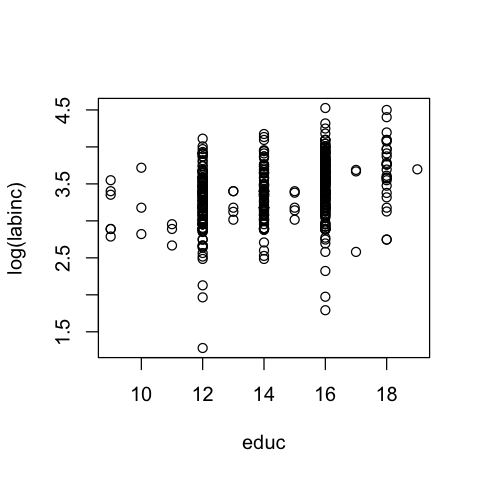

In [97]:
plot(log(labinc)~educ, data=klips1)

In [107]:
attach(klips1)

In [109]:
ols_klips1 = lm(log(labinc)~educ)

In [110]:
summary(ols_klips1)


Call:
lm(formula = log(labinc) ~ educ)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.96127 -0.22241  0.03104  0.23596  1.04562 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.527273   0.124263  20.338  < 2e-16 ***
educ        0.059577   0.008532   6.983 9.28e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.378 on 499 degrees of freedom
Multiple R-squared:  0.08902,	Adjusted R-squared:  0.08719 
F-statistic: 48.76 on 1 and 499 DF,  p-value: 9.278e-12


"교육을 1년 더 받았을 때 레이버인컴이 5.9% 증가한다"

"intercept : 교육을 전혀 받지 않았을 때 log(laberinc)rk 2.52다"

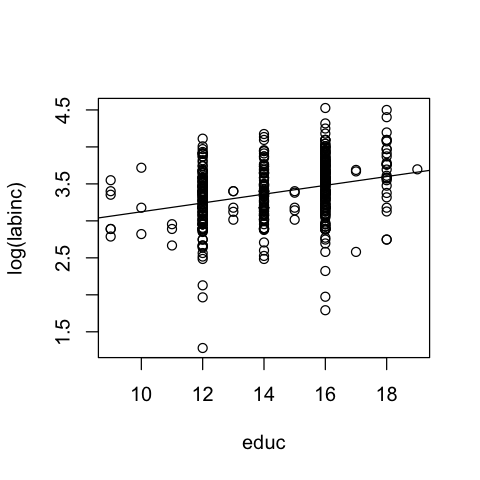

In [111]:
plot(log(labinc)~educ)
abline(ols_klips1)

### 예 : Consumption

In [112]:
install.packages("Ecdat")

also installing the dependencies ‘DEoptimR’, ‘pcaPP’, ‘gtools’, ‘bitops’, ‘leaps’, ‘robustbase’, ‘inline’, ‘rrcov’, ‘fda’, ‘gdata’, ‘RCurl’, ‘XML’, ‘tis’, ‘jpeg’, ‘TeachingDemos’, ‘stringi’, ‘xml2’, ‘BMA’, ‘mvtnorm’, ‘Ecfun’




  There are binary versions available but the source versions are later:
                binary   source needs_compilation
gtools           3.8.1    3.8.2              TRUE
robustbase      0.93-5   0.93-6              TRUE
RCurl         1.98-1.1 1.98-1.2              TRUE
TeachingDemos     2.10     2.12             FALSE
xml2             1.2.5    1.3.1              TRUE


The downloaded binary packages are in
	/var/folders/pj/8y_9p1gs3j3br21cv7hv43dc0000gn/T//RtmpSzeuIb/downloaded_packages


installing the source packages ‘gtools’, ‘robustbase’, ‘RCurl’, ‘TeachingDemos’, ‘xml2’

Warning message in install.packages("Ecdat"):
“installation of package ‘robustbase’ had non-zero exit status”

In [113]:
c("AER", "Ecdat", "lmtest", "car", "sandwich") %in% installed.packages()

[1] FALSE  TRUE FALSE FALSE FALSE

In [114]:
install.packages(c("AER", "lmtest", "car", "sandwich"))

Warning message:
“dependency ‘pbkrtest’ is not available”also installing the dependencies ‘purrr’, ‘rematch’, ‘forcats’, ‘tidyselect’, ‘cellranger’, ‘progress’, ‘zip’, ‘SparseM’, ‘MatrixModels’, ‘sp’, ‘haven’, ‘readxl’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘Formula’, ‘carData’, ‘abind’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’




  There are binary versions available but the source versions are later:
         binary source needs_compilation
purrr     0.3.3  0.3.4              TRUE
quantreg   5.54   5.55              TRUE
lme4     1.1-21 1.1-23              TRUE


The downloaded binary packages are in
	/var/folders/pj/8y_9p1gs3j3br21cv7hv43dc0000gn/T//RtmpSzeuIb/downloaded_packages


installing the source packages ‘purrr’, ‘quantreg’, ‘lme4’

Warning message in install.packages(c("AER", "lmtest", "car", "sandwich")):
“installation of package ‘quantreg’ had non-zero exit status”

In [116]:
data(Consumption, package="Ecdat")

In [117]:
colnames(Consumption)

[1] "yd" "ce"

In [128]:
Consumption

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : formal argument "cols" matched by multiple actual arguments

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = erro

,yd,ce
1947 Q1,59505.0,57168
1947 Q2,59717.4,55464
1947 Q3,59039.1,56332
1947 Q4,61342.6,55836
1948 Q1,60544.6,54488
1948 Q2,60324.6,53676
1948 Q3,62120.7,54208
1948 Q4,62249.1,56704
1949 Q1,61856.1,54872
1949 Q2,62070.3,58588


In [120]:
lm(ce~yd, data=Consumption)


Call:
lm(formula = ce ~ yd, data = Consumption)

Coefficients:
(Intercept)           yd  
  6000.2561       0.8618  


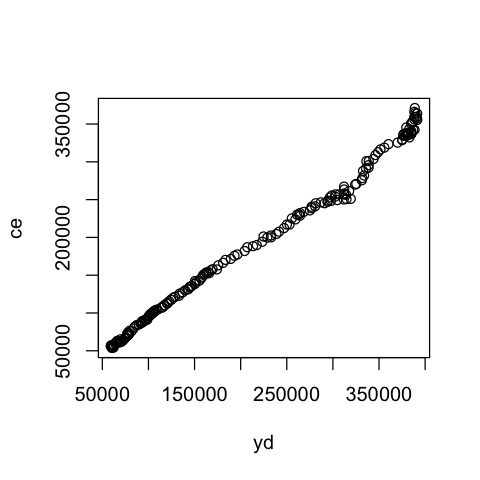

In [121]:
plot(ce~yd, data=Consumption)

In [122]:
nrow(Consumption)

[1] 200

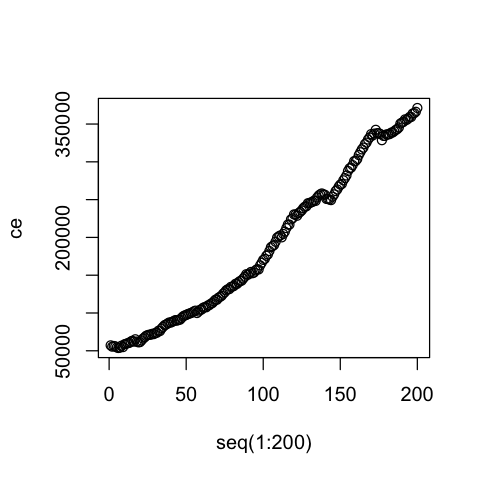

In [125]:
plot(ce~seq(1:200), data=Consumption)

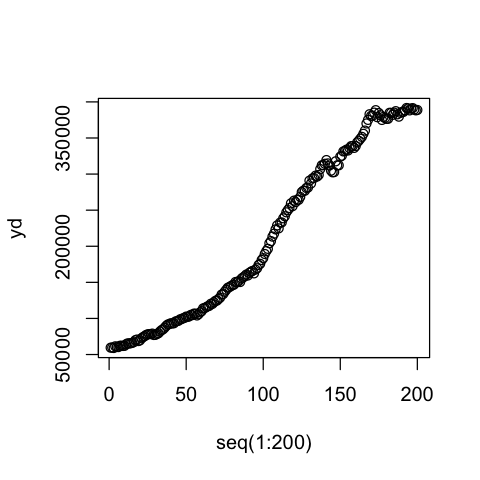

In [126]:
plot(yd~seq(1:200), data=Consumption)

### 예: 담배

In [129]:
data(Cigar, package="Ecdat")
names(Cigar)

[1] "state" "year"  "price" "pop"   "pop16" "cpi"   "ndi"   "sales" "pimin"

In [130]:
head(Cigar)

state,year,price,pop,pop16,cpi,ndi,sales,pimin
1,63,28.6,3383,2236.5,30.6,1558.305,93.9,26.1
1,64,29.8,3431,2276.7,31.0,1684.073,95.4,27.5
1,65,29.8,3486,2327.5,31.5,1809.842,98.5,28.9
1,66,31.5,3524,2369.7,32.4,1915.160,96.4,29.5
1,67,31.6,3533,2393.7,33.4,2023.546,95.5,29.6
1,68,35.6,3522,2405.2,34.8,2202.486,88.4,32.0


In [132]:
attach(Cigar)

    year = 90 만 사용
    log(sales)= b_0 + b_1*log(price) + u_i

In [139]:
nrow(Cigar)

[1] 1380

In [142]:
Cigar90 = subset(Cigar, year==90)

In [143]:
nrow(Cigar90)

[1] 46

In [146]:
attach(Cigar90)

The following objects are masked from Cigar:

    cpi, ndi, pimin, pop, pop16, price, sales, state, year



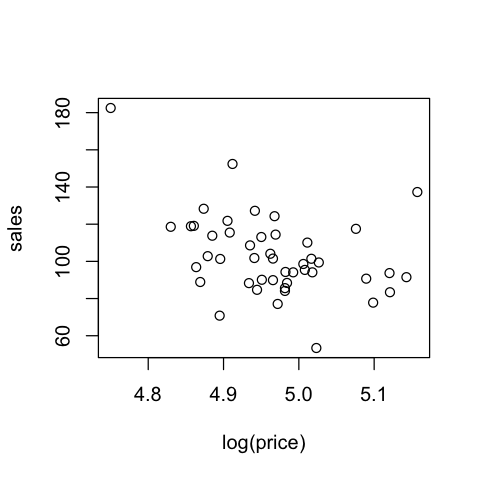

In [147]:
plot(sales ~ log(price), data=Cigar90)

In [157]:
ols_Cigar90 = lm(log(sales)~log(price), data=Cigar90)

In [158]:
summary(ols_Cigar90)


Call:
lm(formula = log(sales) ~ log(price), data = Cigar90)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.58634 -0.11728  0.00776  0.07868  0.47861 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.0812     1.6552   5.487 1.91e-06 ***
log(price)   -0.8992     0.3333  -2.698  0.00985 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1929 on 44 degrees of freedom
Multiple R-squared:  0.142,	Adjusted R-squared:  0.1225 
F-statistic:  7.28 on 1 and 44 DF,  p-value: 0.00985


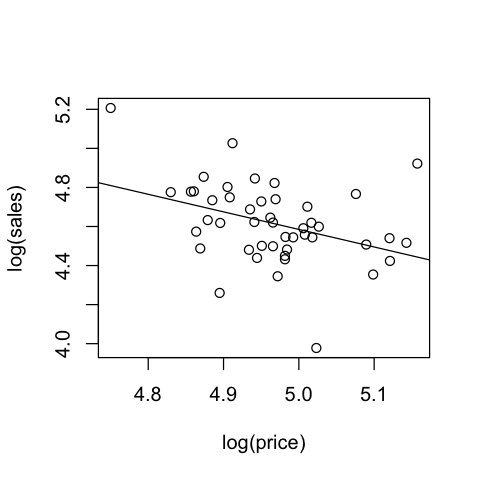

In [162]:
plot(log(sales)~log(price), data=Cigar90)
abline(ols_Cigar90)

In [160]:
# 정답
sum(Cigar$year==90)

[1] 46

In [161]:
ols4 = lm(log(sales)~log(price), data=Cigar, subset=year==90)

In [155]:
summary(ols4)


Call:
lm(formula = log(sales) ~ log(price), data = Cigar, subset = year == 
    90)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.58634 -0.11728  0.00776  0.07868  0.47861 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.0812     1.6552   5.487 1.91e-06 ***
log(price)   -0.8992     0.3333  -2.698  0.00985 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1929 on 44 degrees of freedom
Multiple R-squared:  0.142,	Adjusted R-squared:  0.1225 
F-statistic:  7.28 on 1 and 44 DF,  p-value: 0.00985


# 4장 추정값과 참값의 관계
## 4.3 상상 속의 표본추출은 어떻게?

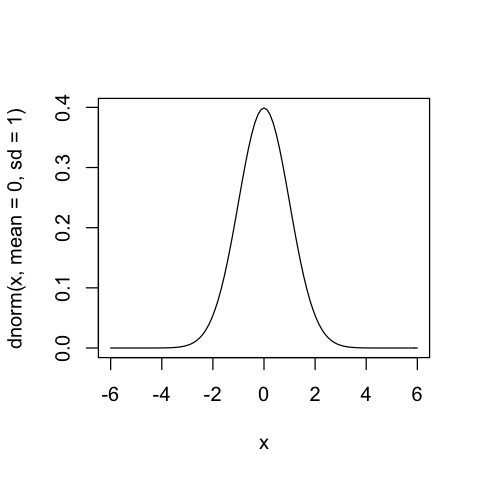

In [170]:
curve(dnorm(x, mean=0, sd=1), -6, 6)